*Sjekk først at du har installert pakkene riktig ved å kjøre kodeblokken under:*

In [5]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random as rd

*Gå nøye gjennom Introduksjonsnotebooken før du gjør øvingen. Alle verktøy du vil trenge presenteres der.*

In [6]:
student_seed = 10123 #Skriv inn kandidatnummeret ditt her, 10XXX 

# Introduksjon
I denne øvingen skal vi lære om ulike måter å måle viktigheten, eller sentraliteten, til en node i et nettverk. Vi skal også se på ulike graftyper, lære enkel analyse og til slutt se på tilfeldige og målrettede feil i et nettverk.

Følgende temaer er forventet at du skal kunne etter denne øvingen:
* Sentraliteter
* Mål på sammenkobling av nettverk
    * Noder i største partisjon
* Angrepsmål i et nettverk
    * Viktigheten av en node
    * Angrepsstrategier i nettverk
* Robusthet/utholdenhet
    * Redundans
* Kostnad ved redundans/trade-offs og effekten av dette




For å gjennomføre denne øvingen forventes det at man har gjennomført introduksjonen, og kan bruke verktøyene som ble introdusert der til mer krevende oppgaver. For oppgavene nedenfor forventes det at studenten klarer å svare kort og konkret.

# Del 1: Grafstrukturer og sentraliteter
I denne delen skal vi introdusere mål på viktigheten for en node i et nettverk. Her skal vi lære om tre forskjellige standariserte mål: 
* degree centrality
* betweenness centrality
* closeness centrality. 

Vi skal også ta en nærmere titt på ulike graftyper og analysere deres fordeler og ulemper.

## Oppgave 1.1
I denne delen skal vi bli kjent med hvordan man plotter grafer. 

### Oppgave 1.1.1
Enkle grafstrukturer som er mye brukt er mesh, star, ring, tree og bus. Ved hjelp av metodene introdusert i introduksjonen, konstruer og print en enkel versjon av tre av disse grafene (4-8 noder).

<em> Her forventer vi å se tre graftyper konstruert og printet </em>

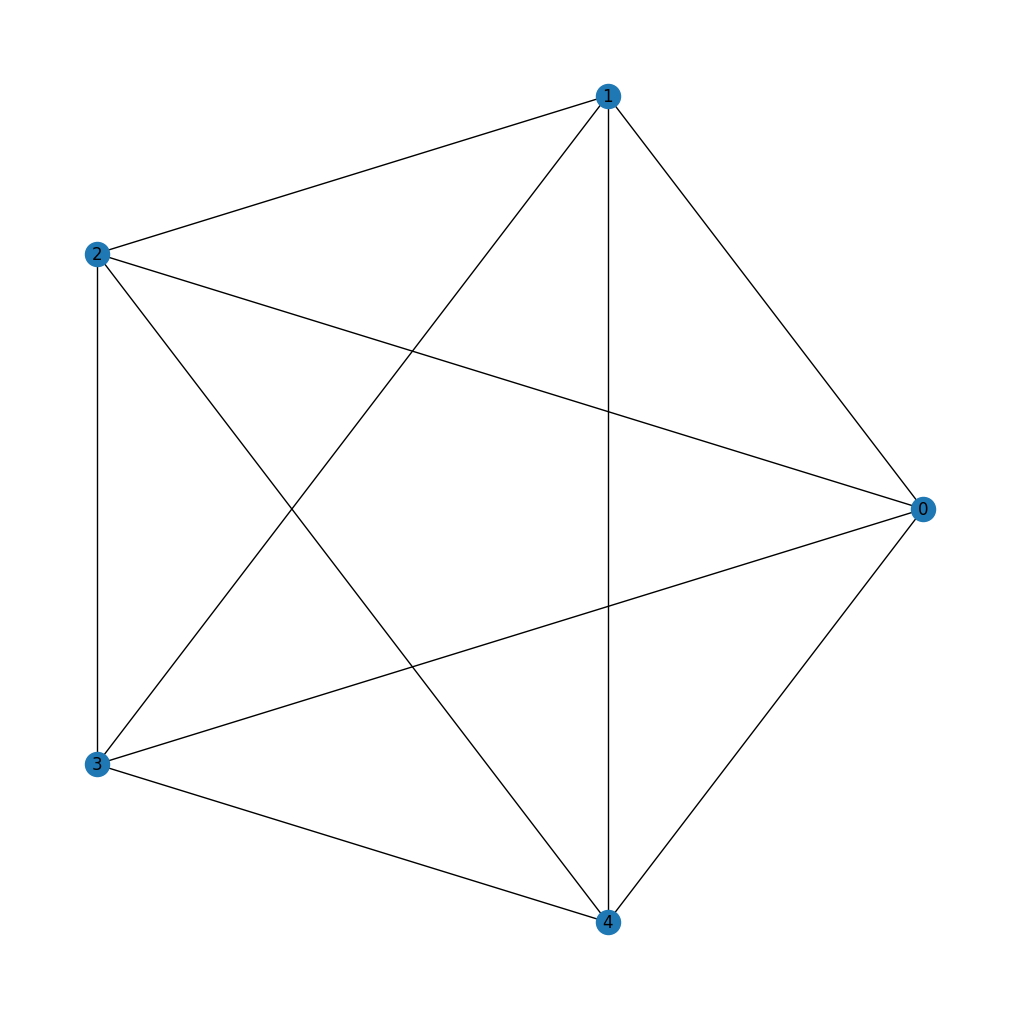

In [7]:
#Mesh

meshGraph = MeshGraph(5)
meshGraph.draw()


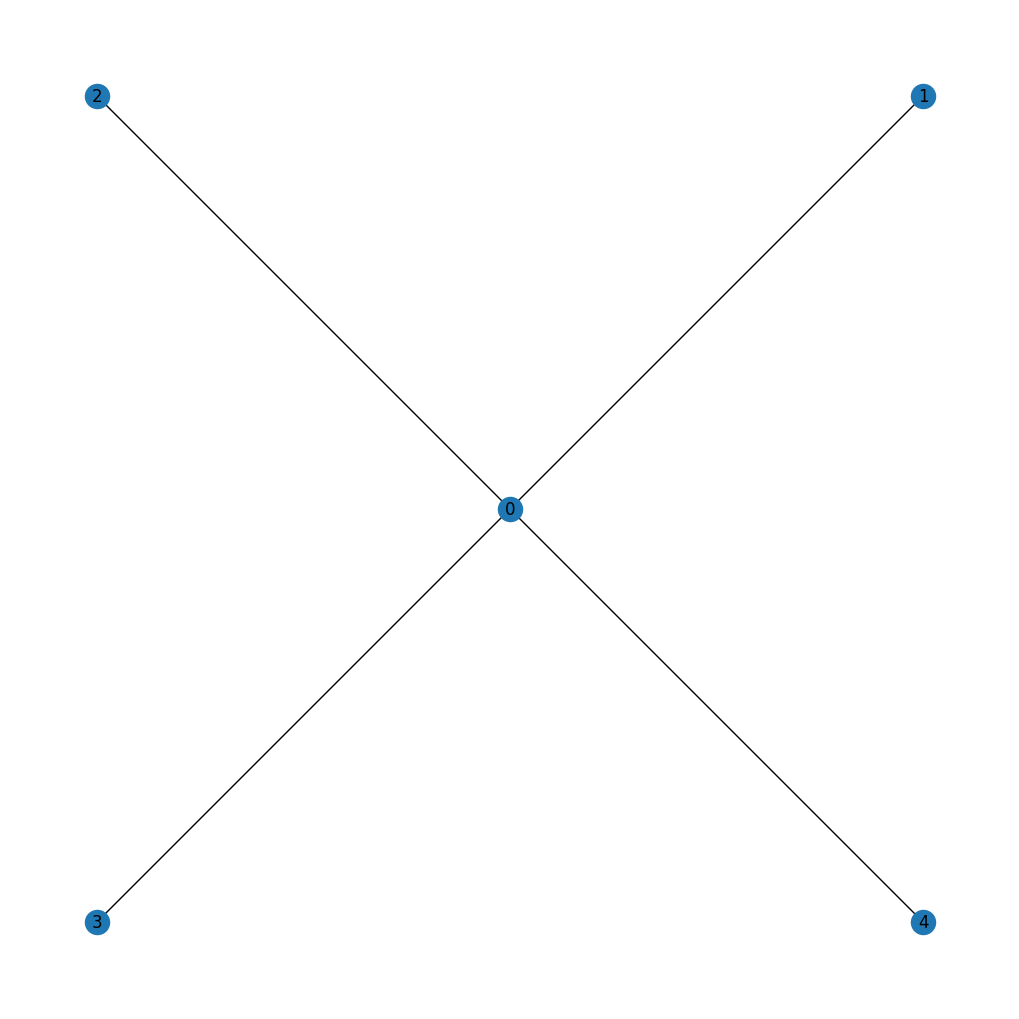

In [8]:
#Kode her

starGraph = StarGraph(4)
starGraph.draw()


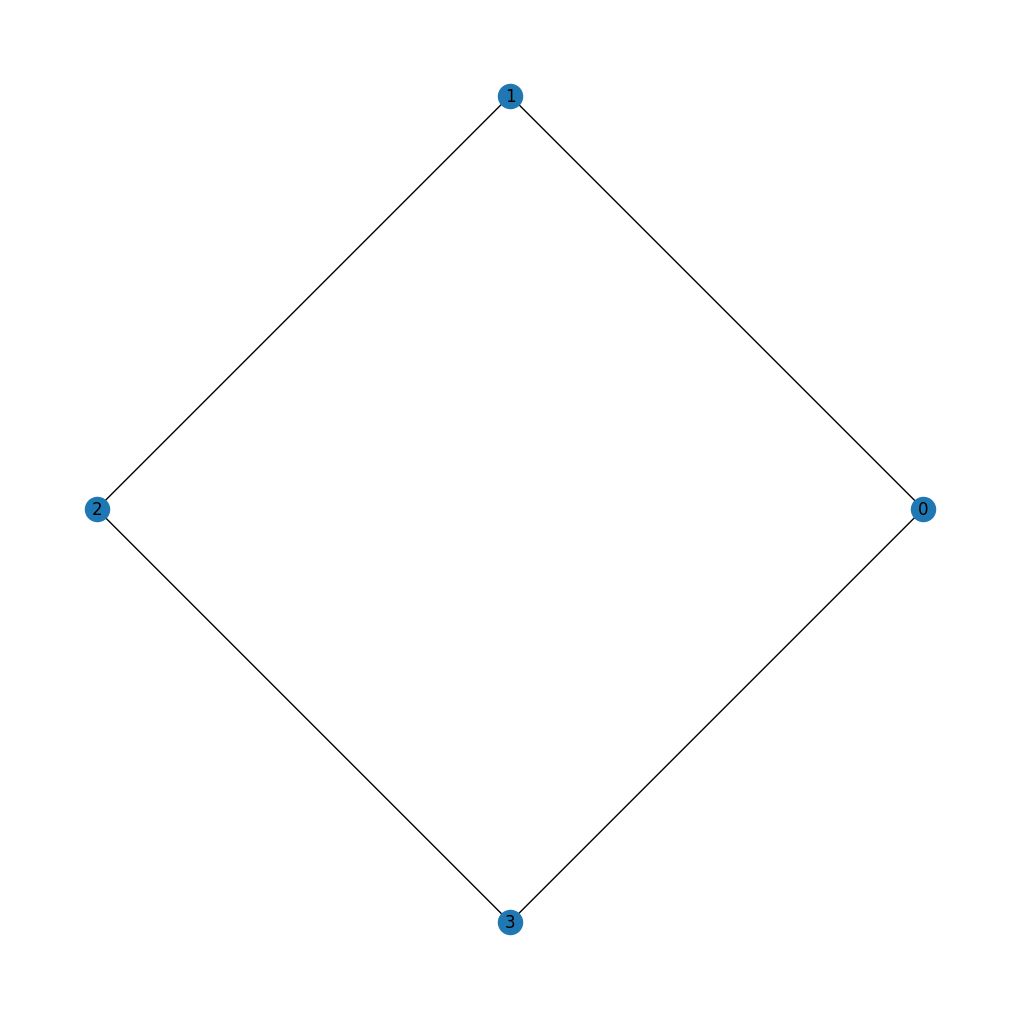

In [9]:
#Kode her

ringGraph = RingGraph(4)
ringGraph.draw()

### Oppgave 1.1.2

Lag en **sammenhengende** graf ved å først opprette et objekt av klassen <code> Graph </code>. Legg deretter til 4-8 noder ved å bruke metoden <code>add_node()</code> eller <code>add_nodes_from()</code>. Legg så til kanter mellom de nodene du ønsker ved å bruke <code>add_edge()</code> eller <code>add_edges_from()</code>. Bruk til slutt metoden <code>draw()</code> for å tegne grafen. Grafen skal ha mellom 4 og 8 noder.

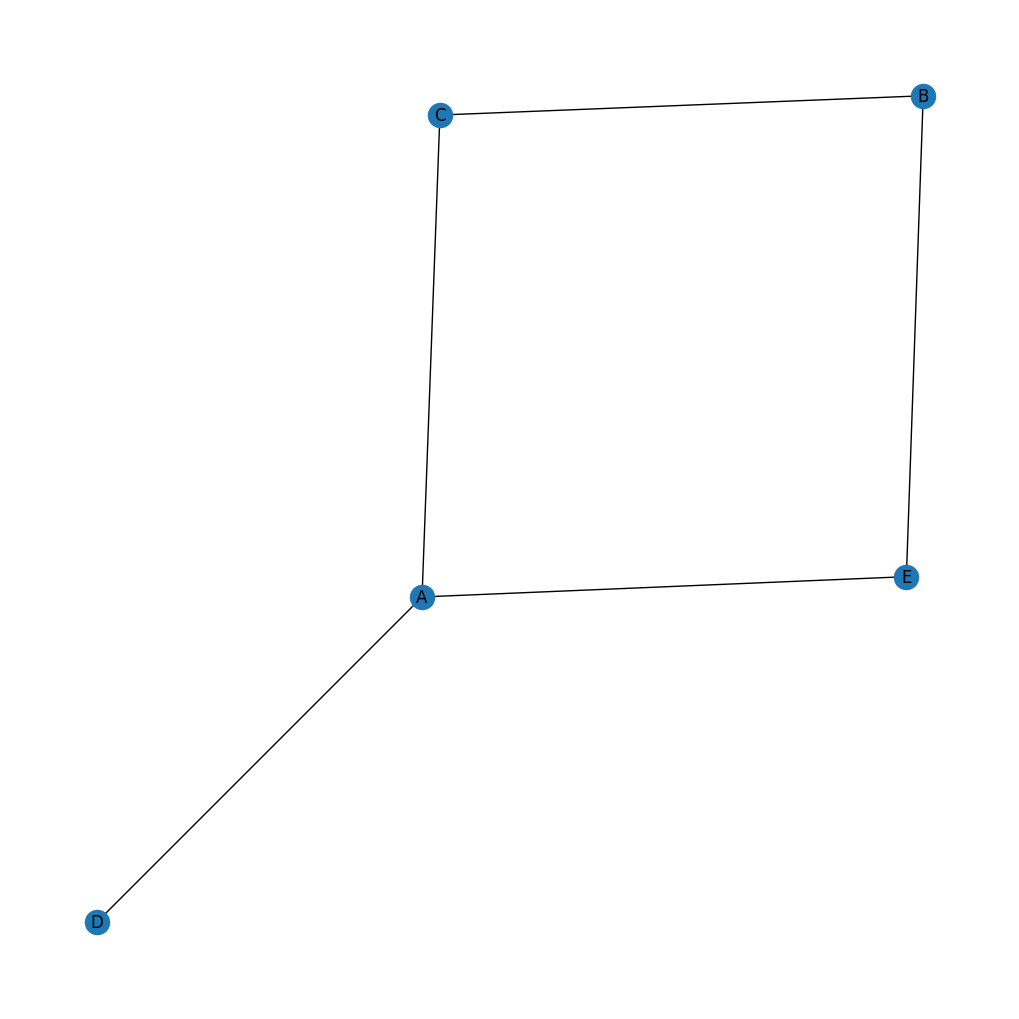

In [10]:
#Kode her
graf = Graph()
graf.add_nodes_from(["A", "B", "C", "D", "E"])
graf.add_edges_from(ebunch_to_add=
    [
        ("B", "C"),
        ("B", "E"),
        ("A", "C"),
        ("A", "D"),
        ("A", "E")
    ]
)

graf.draw()

## Oppgave 1.2
Forklar begrepene closeness centrality, betweenness centrality og degree centrality. Vil en node som har høy degree centrality også ha høy betweeness centrality? Forklar hvorfor/hvorfor ikke. 

<em> Her forventer vi å se at man har forstått hva de ulike centralitiene måler og forskjeller mellom dem. </em>

### Closeness centrality
Med Closeness centrality finner man den noden som nærmest alle andre noder. Dette gjøres ved å kalkulere en verdi (closeness) for hver node i grafen. For å finne closenessverdien deler man antall andre noder i grafen (totalt antall node - 1) på summen av alle korteste distansene til alle andre noder.

Altså $\dfrac{n - 1}{\Sigma_{i ≠ j} d_{ij}}$, hvor $n$ er totalt antall noder, $d_{ij}$ er distansen fra en node til en annen og derfor er $\Sigma_{i ≠ j} d_{ij}$ altså summen av alle korteste distansene til alle andre noder.


### Betweenness centrality

Med betweenness centrality finner man ved å finne den korteste veien mellom alle nodepar, og så se hvor mange av disse veiene (paths) som går gjennom hver node $v_{i}$. Dette regnes til en sum ved å summere alle andelene 

$\text{Unike korteste stier som vår gjennom en node } v_{i} = \text{betweenness score for }v_{i} = b_{i}$

$b_{i} = \dfrac{\text{Antall korteste veier mellom et nodepar som går gjennom }v_{i}}{\text{Antall korteste veier mellom et nodepar}}$

Den noden som er mest sentral er da altså den noden med høyest $b_{i}$
### Degree centrality

Går gjennom hver node og finner den noden med flest naboer (Høyest degree)
### Vil en node som har høy degree centrality også ha høy betweeness centrality?

ikke nødvendigvis. Degree centrality har svakheter fordi den ser kun på lokale naboer
I grafen under vil S være mest sentral hvis man målet med betweeness centrality og D og E være mest sentral dersom man måler med degree centrality

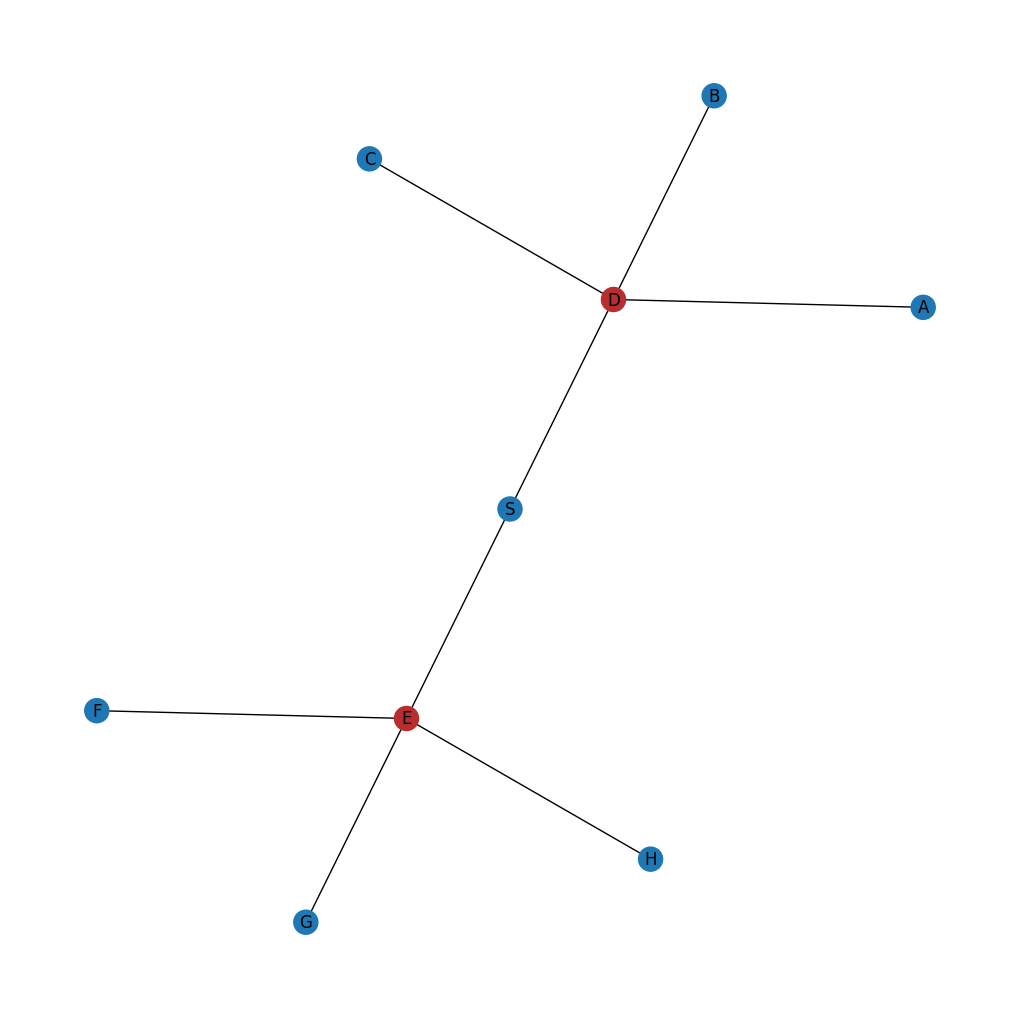

In [11]:
graf = Graph()
graf.add_nodes_from(["A", "B", "C", "D", "S", "E", "F", "G", "H"])
graf.add_edges_from(ebunch_to_add=
    [
        ("A", "D"),
        ("B", "D"),
        ("C", "D"),
        ("D", "S"),
        ("S", "E"),
        ("F", "E"),
        ("G", "E"),
        ("H", "E"),
    ]
)

graf.mark_nodes(["D", "E"])


## Oppgave 1.3
For hver av grafene fra oppgave 1.1.1 og 1.1.2, finn noden med høyest **betweenness centrality** for hånd. Vis utregning og forklar viktigheten til en node med høy betweenness centrality.

<em> Her forventer vi å se at man har forstått seg på hva begrepet betweenness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode og en kort kommentar på hvorfor denne noden er viktig.</em>

### 1.1.1
I denne grafen har alle nodene en direkte kobling til alle andre grafer. Derfor går alle kanter gjennom ingen andre noder. 
Derfor vil $b_{i}$ for alle $i$ være 0. 

$b_{i} = \dfrac{0}{1} = 0$ 

Siden alle nodene har lik betweeness centrality er alle nodene like viktige (eller like uviktige), man kan derfor ikke si at en node er viktigere enn en annen


### 1.1.2
Nodene 1,2,3 og 4 har degree 1 og har derfor ingen veier gjennom dem $\implies$ de har betweennesscentrality 0
Noden 0 har betweenness centrality 1, fordi alle andre korteste veier går gjennom node 0:

alle korteste veier (som ikke starter eller slutter i node 0):
(1, 2), (1, 3), (1, 4)
(2, 3), (2, 4)
(3, 4)

$\implies$ 6 korteste veier

Alle 6 av dem går gjennom 0 $\implies \dfrac{6}{6} = 1$ 

I et nettverk ville node 0 vært viktigst, da alle korteste veier går gjennom den (for mer generelle grafer: flest korteste veier). Nettverket vil faile totalt dersom denne noden går den (for mer generelle grafer: størst andel av nettverket vil faile). 

## Oppgave 1.4
For hver graf, finn noden med høyest **closeness centrality** for hånd. Vis utregning og forklar viktigheten til en node med høy closeness centrality.

<em> Her forventer vi å se at man har forstått seg på hva begrepet closeness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode og en kort kommentar på hvorfor denne noden er viktig.</em>

## IMprotance
A node with a high degree of closness centrality implies that a lot of shortest paths go through it or that it is at the center of the graph. Meaning that loosing the or some of the nodes with highest degree will probably lead to the network loosing its robustness and efffiency. Usning normalized closeness centrailty gives us a formula that we can use to compare nodes and graphs regardless of the size of the network. $ \dfrac{N-1}{\sum{y}(d(y,x))} $

## 1:

The first graph is a mesh meaning that all nodes are connected to eachother, this gives us $ \dfrac{4}{1 + 1 + 1 + 1} = 1 $ for all nodes in the graph. Hence all the nodes have the same degree and are equally importantn in the mesh graph 

## 2:

The second graph is a star graph, looking at node 0 gives us $ \dfrac{4}{1+1+1+1} = 1 $ so it has a closeness degree of 1. Lokking at the other four nodes, we deduce that because of symtery in the graph they have the same closeness degree. $ \dfrac{4}{2 + 2 + 2 + 1} = \dfrac{4}{7} $ looking at the closeness degree of the other four nodes, we see that nodes 0 is the most important nodes in this network as it has the highest closeness centrailty and is therfore the "most centerlized" node in the network 

## 3:

The third graph is a circle graph with 4 nodes, becuase of symmetry all the nodes have the same closeness degree, $ \dfrac{3}{1 + 1 + 2} = \dfrac{3}{4}$, looking at the central closeness degree of the nodes we deduce that all them are eqaually importnatnas they all hvae the same degree in centraility. 

## Oppgave 1.5
For hver graf, finn noden med høyest **degree centrality** for hånd. Vis utregning og forklar viktigheten til en node med høy degree centrality.

<em> Her forventer vi å se at man har forstått seg på hva begrepet degree centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode og en kort kommentar på hvorfor denne noden er viktig.</em>

### Graf 1.1.1 (Mesh graph)

Alle noder har en direkte kobling til alle andre noder. Alle noder har derfor $n-1$ naboer (hvor $n$ er antall noder) $\implies n-1$ degrees

Alle noder har derfor en degree centrality på $\dfrac{\text{antall naboer}}{\text{maksimalt mulige antall naboer, } n-1 } = \dfrac{n-1}{n-1} = 1$


### Graf 1.1.2 (Star graph)


I denne grafen har nodene 1,2,3 og 4 nøyaktig én node (node 0), de har derfor  en degree av $\dfrac{1}{n-1} = \dfrac{1}{4}$ 

Node 0 er nabo med alle andre noder og har derfor er degree centrality på $\dfrac{n-1}{n-1} = \dfrac{4}{4} = 1$

I et nettverk ville node 0 vært viktigst, da alle netverket failer fullstendig uten den

### Graf 1.1.3 (Ring graph)

I en ring graph vil alle noder ha nøyalktig to naboer, alle noder har derfor en degree av $\dfrac{2}{n-1} = \dfrac{2}{3}$ 

Alle noder er like viktige, men nettverket tåler (failer ikke) dersom en (hvilken som helst) node failer.


## Oppgave 1.6
### Degree distribution kan vises med et histogram. Hva er degree distribution og hvorfor er det logisk å se på det med et histogram?

Et histogram være en nyttig måte å visualisere og forstå hvordan grader (degrees) er fordelt i et nettverk. Dette kan hjelpe å identifisere hvor stor del av nettverket består av dominante (sentrale) noder og (mindre sentrale) løvnoder. Man får et inntrykk over hvor mange slike sentrale noder man har.

For hver av de 4 tidligere grafene, lag et histogram over degree distribution og kommenter hva du ser.

* Bruk metoden <code>histogram()</code> for å gjøre dette

<em> Vi forventer å se at studenten har skjønt hva et degree distribution representerer og bruken av denne. I tillegg forventer vi et histogram per graf, med en kort kommentar på hva dette histogrammet forteller om grafen </em>

### Graf 1.1.1.1 (Meshgraph)

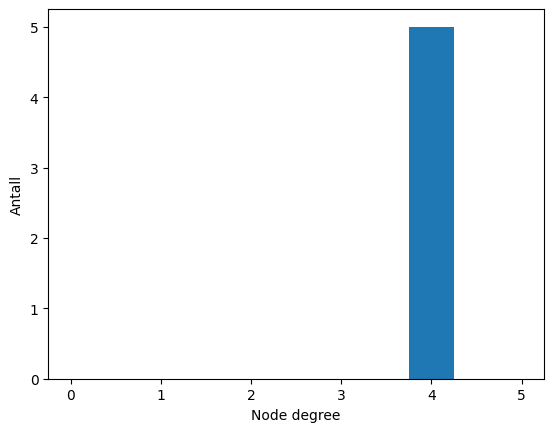

In [12]:
meshGraph.histogram();

Kommentar (Mesh ^^): Histogrammet forteller oss at alle noder har like mange naboer, at alle har nøyaktig 4 naboer. Vi vet det er 5 noder i grafen og dermed også at denne grafen er en meshgraph siden alle $n$ noder har $n-1$ naboer. Den froteller oss at det ikke er noen noder som er viktigere enn andre.

### Graf 1.1.1.2 (Stargrapf)

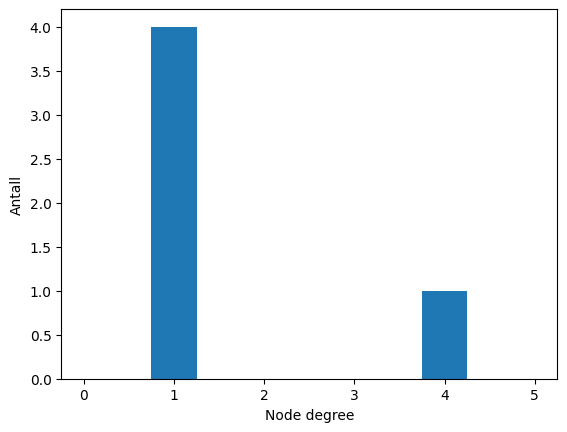

In [13]:
starGraph.histogram();

Kommetar (Star ^^): Vi kan utifra histogrammet se at grafen består av én sentral node og mange løvnoder. Vi kan se at dette er en stargraph. Den ene noden som har én nabo vil derfor være den dominerende grafen. 

### Graf 1.1.1.3 (ringgraph)

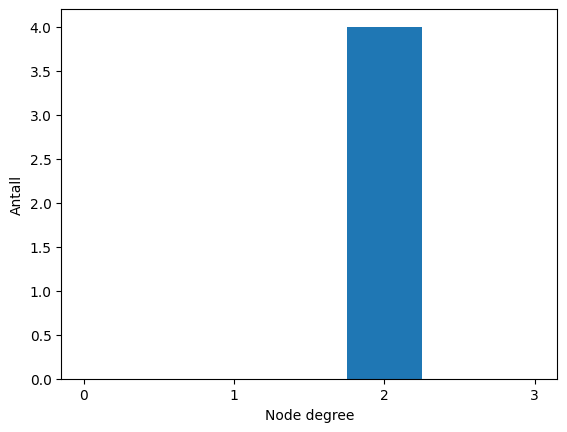

In [14]:
ringGraph.histogram();

Kommentar (Ring ^^): Histgrammet forteller oss at samtlige noder har nøyaktig $2$ naboer. Dette er kun mulig i en ringstruktur, altså dette er en ringgraph. Det er ingen noder som er viktigere enn andre, og de resterende nodene nettverket fungerer helt om en node skulle faile.  

### Graf 1.2.1 (custom graf)

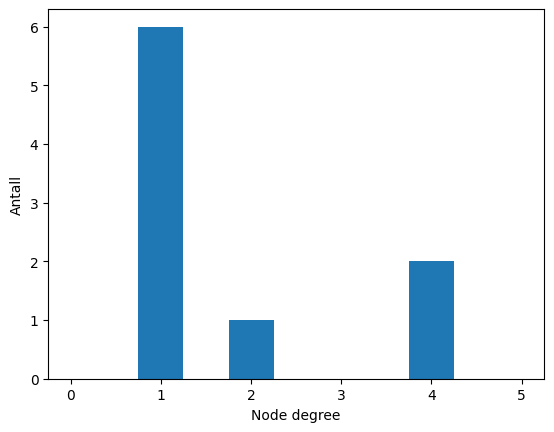

In [15]:
graf.histogram();

Kommentar (Custom ^^): Histogrammet forteller oss at vi har én sentral node og flere nokså sentrale noder (mulig en ring), og én løvnode

# Del 2: Strukturanalyse
I denne delen skal vi introdusere flere grafstrukturer. Disse grafstrukturene er mer komplekse, men gjenspeiler bedre relle nettverk. <br/> <em>Et tips her er å bruke seed=student_seed for å få samme graf her gang.</em>

## Oppgave 2.1

Lag følgende 4 grafer, alle med 121 noder:

    Graf 1: En Barabasi Albert graf med parameter m=1
    Graf 2: En Barabasi Albert graf med parameter m=4
    Graf 3: En Watts Strogatz graf med parametre k=2 og p=0.2
    Graf 4: En Watts Strogatz graf med parametre k=4 og p=0.2

Opprett et objekt for hver graf og tegn de.

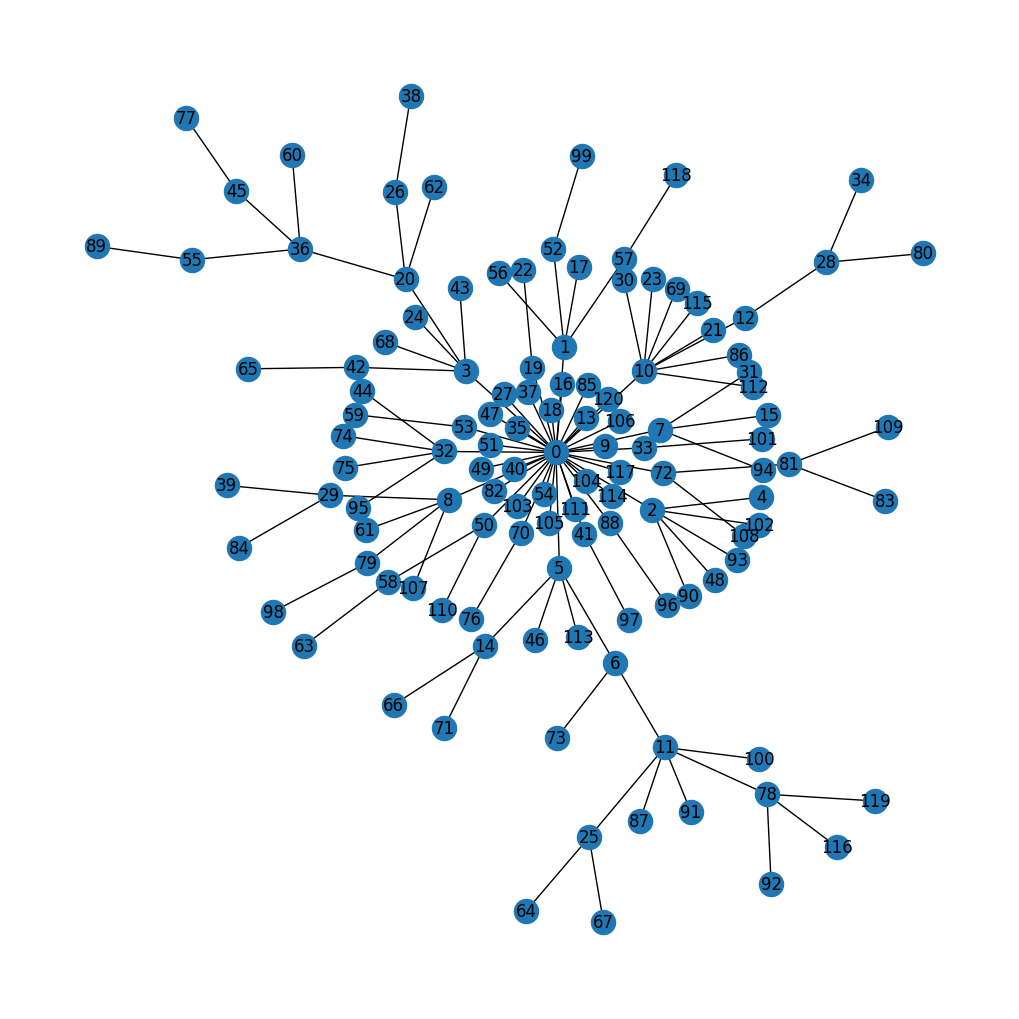

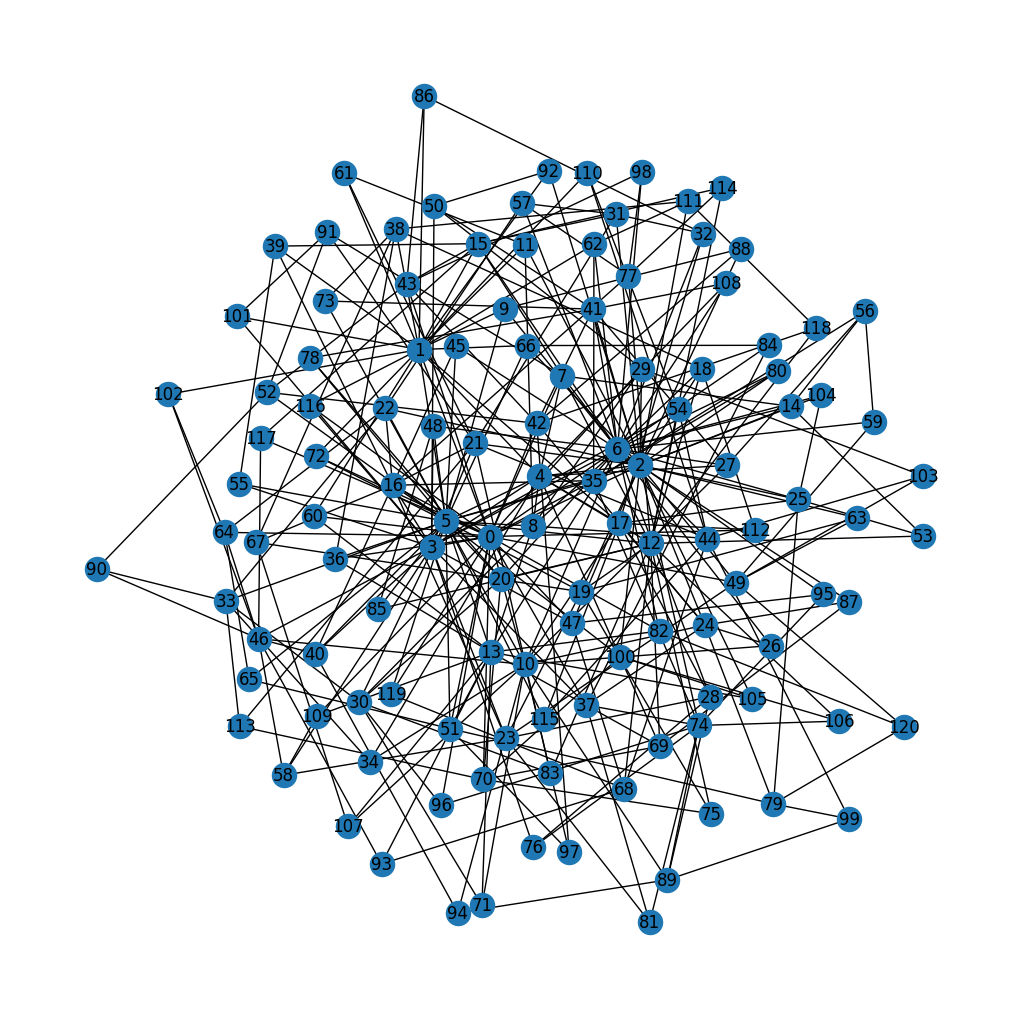

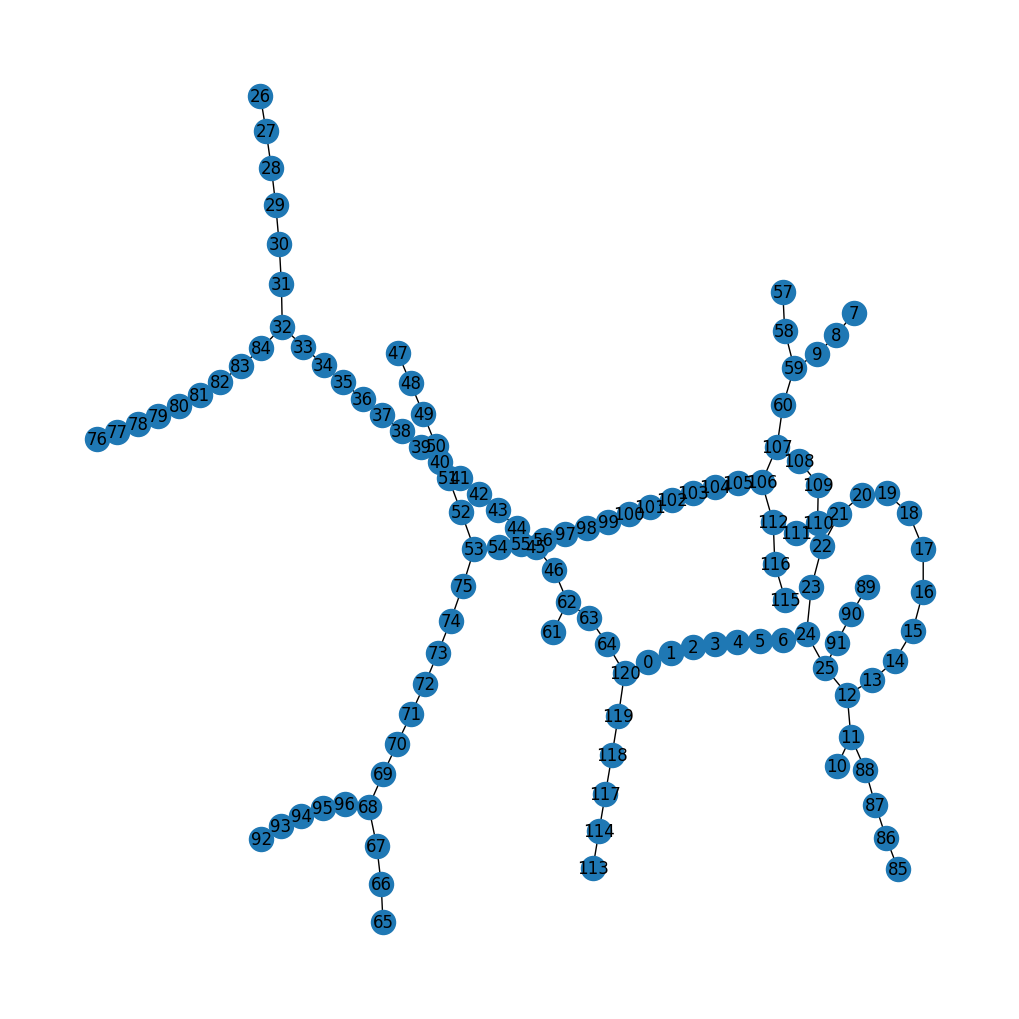

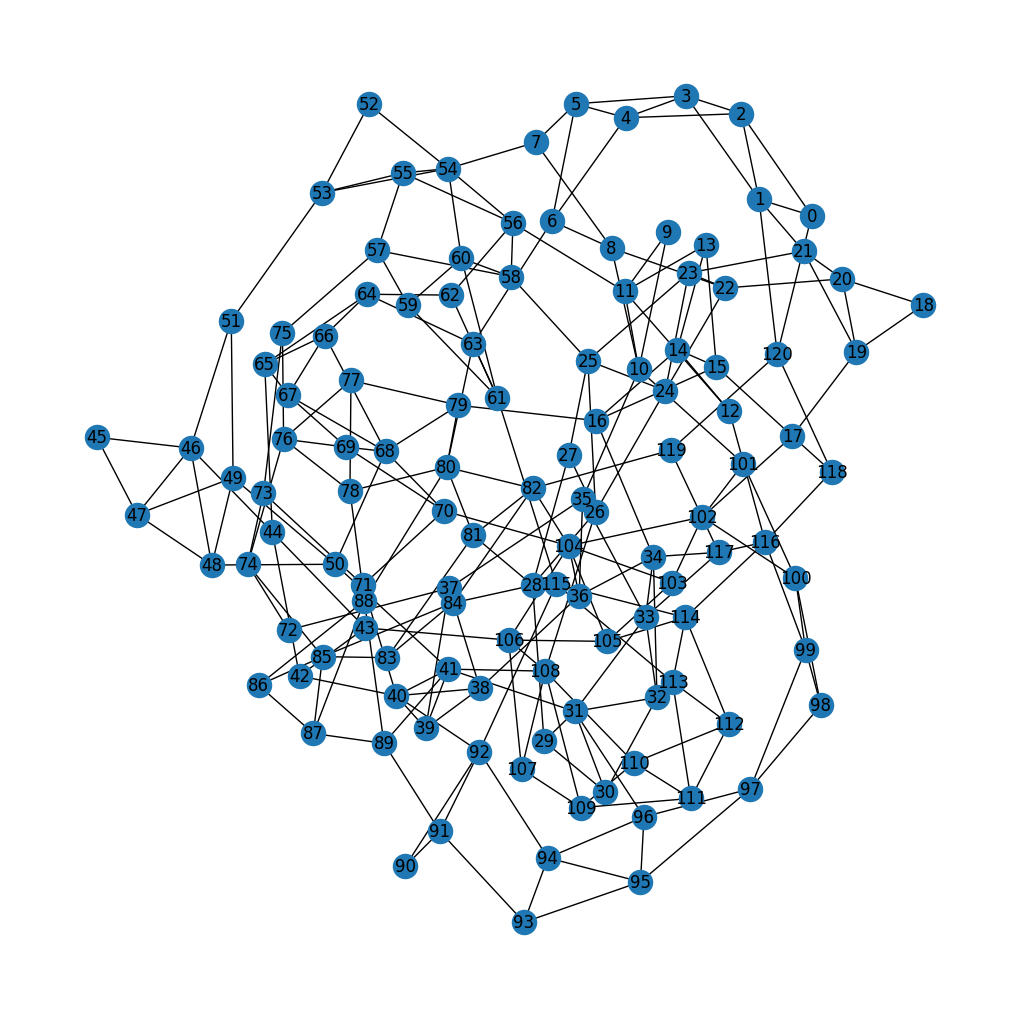

In [16]:
ba1 = BarabasiAlbert(n=121, m=1)
ba2 = BarabasiAlbert(n=121, m=3)

ws1 = WattsStrogatz(n=121, k=2, p=0.2)
ws2 = WattsStrogatz(n=121, k=4, p=0.2)

ba1.draw()
ba2.draw()
ws1.draw()
ws2.draw()

### Oppgave 2.1.1
Kommenter grafene du har tegnet.

<em> Her forventer vi en sammenhengende tekst der man ser på likheter og forskjeller mellom de forskjellige grafene, med fokus på styrker og sårbarheter. </em>

ba1 = BarabasiAlbert(n=121, m=1)
ba2 = BarabasiAlbert(n=121, m=3)

ws1 = WattsStrogatz(n=121, k=2, p=0.2)
ws2 = WattsStrogatz(n=121, k=4, p=0.2)


Looking at graph ba1 have a struture where there are a few centrelized nodes, here if we loose a node with high centrality like 3, 6 or 1 we get a disjunct graph and will lose many connections. This makes graph ba1 weak to targeted attacks, however if one of the leaf nodes or nodes with low cloesness centrality where to be lost this would only remove a few of the connections between paths. This makes ba1 resiliant to attacsk that target random nodes. Graph ba2 resembels a mesh network, where all of the nodes have more then 2 edges and there are nodes with high closeness centraility, in this network we can loose any node without loosing any connections, in this network there are many nodes with high centraility and relativiely high edge count. When it comes to attacks this network can loose a substantial amoun of nodes, mkaing it a robust network. Looking at network ws1 compared to the other two we se that this network is has nodes with reletively high centraility compared to other nodes in the networking. There are loops in the center of the network however loosing a node, 80 or 18 would remove a lot of conecctions from the graph. This makes the graph weak for targeted attacks and attacks that remvoe random nodes or connections. The last graph ws2 has a even normalized centrality with a few nodes with more edges then others. This makes ws2 a robust network that is both resilient to targeted and random attacks.


### Oppgave 2.1.2
Finn degree distribution for grafene du tegnet. Kommenter. Hva sier degree distribution om robustheten til grafene?

<em> Her forventer vi at studenten klarer å finne degree distribution for grafene fra oppgave 2.1. Kommenter hva fordelingen vil si for robustheten til grafene, og sammenlign grafenes robusthet. </em>

## Oppgave 2.2

### Oppgave 2.2.1

Hvordan endrer degree distribution seg for en Barabasi Albert graf seg når m øker? Test det ut og forklar hvorfor.

In [17]:
#Skriv kode her


### Oppgave 2.2.2
Hvordan endrer degree distribution seg for en Watts Strogats graf dersom p øker? Test det ut og forklar hvorfor.

In [18]:
#Skriv kode her


## Oppgave 2.3
### Oppgave 2.3.1

Konstruer et nettverk der den samme noden har høyest betweeness, degree og closeness centrality. Bruk innebygde funksjoner til å vise at du har fått til oppgaven.

In [19]:
#Kode her


### Oppgave 2.3.2

Konstruer et nettverk der den noden som har høyest closeness centrality **ikke** er den samme som har høyeste degree centrality.

<em> Her forventer vi at studentene skjønner sentralitetsbegrepene og forskjellene mellom dem. </em>

In [20]:
#Kode her


In [21]:
#Skriv beregning for degree og closeness centrality her 


# Del 3: Angrep og robusthet
I denne oppgaven skal vi analysere et fiktiv nettverk, som simulerer et reelt nettverk.

## Oppgave 3.1

<code>ConstructedGraph()</code> simulerer et reelt nettverk, bestående av et kjernenett med grid-struktur, et regionalnett og et tettbygd aksessnett. Bruk <code>ConstructedGraph()</code> for å tegne grafen.

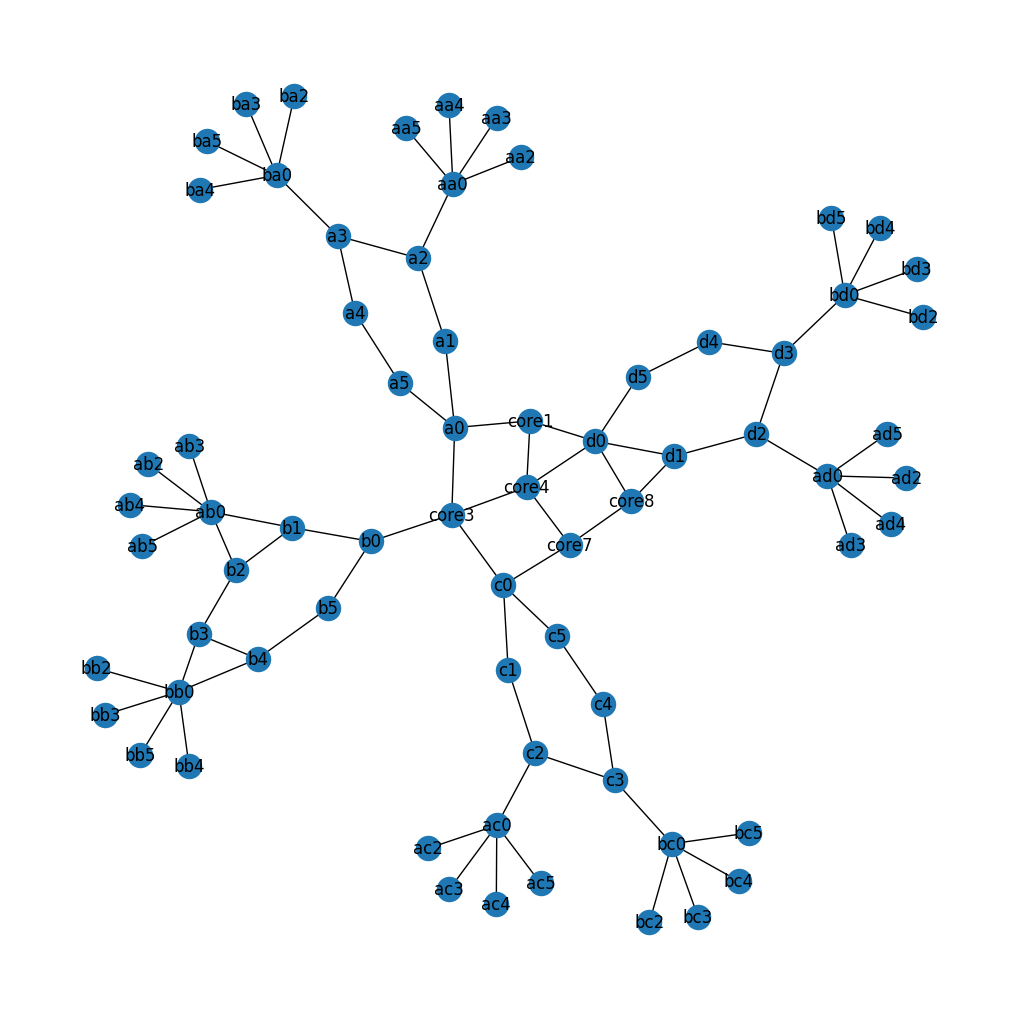

In [22]:
#Kode her
constructedGraph = ConstructedGraph()
constructedGraph.draw()

### Oppgave 3.1.1
Uten å se på centralities, hvilke(n) node(r) tror du er viktigst for nettverket?

Svaret på dette spørsmålet kommer veldig an på hva man definerer som $viktigst$. Det vil være naturlig å konkludere at nodene i kjerenett er viktigst. Likevel kan man se at noen av nodene i kjernenettet har redundante veier. Og man kan derfor, i en angrepssituasjon, se på andre noder som a0, b0, c0, som er rotnoder i reginalnettverk og slukker hele regionalnettverket sitt dersom de failer. 


### Oppgave 3.1.2
For hver av de tre centralitiene, finn de mest sentrale nodene og marker de. 
Hvordan ville du beskrevet robustheten til nettverket?

<em> Her forventer vi at studenten skjønner hvilke deler dette nettverket er bygget opp av. Deretter forventer vi at studenten viser de mest sentrale nodene innenfor hver kategori, og drøfter robustheten til nettverket.  </em>

Degree centrality - Node: ab0 0.08823529411764705
Closeness centrality - Node: core3 0.23776223776223776
Betweenness centrality - Node: d1 0.23836698858647937


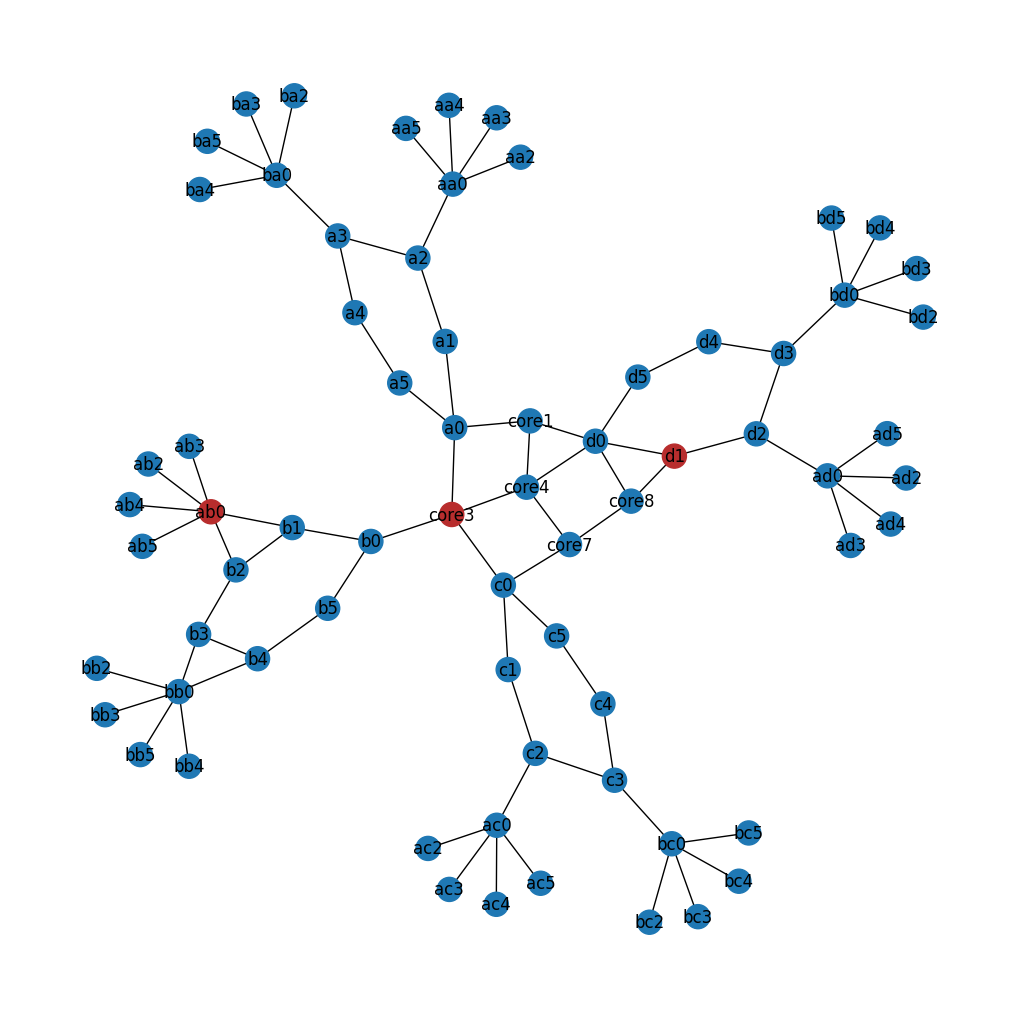

In [23]:
degree_centrality = constructedGraph.degree_centrality().items()
degree_val, degree_node = 0, None

for node, degree in degree_centrality:
    if degree > degree_val:
        degree_val = degree
        degree_node = node
        
print(f"Degree centrality - Node: {degree_node}".ljust(15), degree_val)



closeness_centrality = constructedGraph.closeness_centrality().items()
closeness_val, closeness_node = 0, None

for node, degree in closeness_centrality:
    if degree > closeness_val:
        closeness_val = degree
        closeness_node = node
        
print(f"Closeness centrality - Node: {closeness_node}".ljust(15), closeness_val)



betweenness_centrality = constructedGraph.betweenness_centrality().items()
betweenness_val, betweenness_node = 0, None

for node, degree in betweenness_centrality:
    if degree > closeness_val:
        betweenness_val = degree
        betweenness_node = node
        
print(f"Betweenness centrality - Node: {betweenness_node}".ljust(15), betweenness_val)

constructedGraph.mark_nodes(["ab0", "core3", "d1"])


### Oppgave 3.1.3
For hver av de tre centralitiene, hvordan påvirkes nettverket dersom den mest sentrale noden fjernes? Hvilken centrality ville du brukt for å vurdere hvilke noder som er viktigst i nettverket?

<em> Her forventer vi at studenten ikke fjerner 3 noder samtidig, men ser på en og en centrality. </em>

In [24]:
print("= = = = = = = = = = =\nDegree centrality:")
constructedGraph = ConstructedGraph()
print("Nuber of connected nodes before removal:", constructedGraph.number_of_nodes())
central_node = "ab0"
constructedGraph.remove_node(central_node)
print("Nuber of connected nodes after removal:", constructedGraph.get_largest_components_size())

print("= = = = = = = = = = =\nCloseness centrality:")
constructedGraph = ConstructedGraph()
print("Nuber of connected nodes before removal:", constructedGraph.number_of_nodes())
central_node = "core3"
constructedGraph.remove_node(central_node)
print("Nuber of connected nodes after removal:", constructedGraph.get_largest_components_size())

print("= = = = = = = = = = =\nBetweenness centrality:")
constructedGraph = ConstructedGraph()
print("Nuber of connected nodes before removal:", constructedGraph.number_of_nodes())
central_node = "d1"
constructedGraph.remove_node(central_node)
print("Nuber of connected nodes after removal:", constructedGraph.get_largest_components_size())

= = = = = = = = = = =
Degree centrality:
Nuber of connected nodes before removal: 69
Nuber of connected nodes after removal: 64
= = = = = = = = = = =
Closeness centrality:
Nuber of connected nodes before removal: 69
Nuber of connected nodes after removal: 52
= = = = = = = = = = =
Betweenness centrality:
Nuber of connected nodes before removal: 69
Nuber of connected nodes after removal: 68


#### For hver av de tre centralitiene, hvordan påvirkes nettverket dersom den mest sentrale noden fjernes?
##### Degree centrality: 
Når noden ab0 blir fjernet påvirker det i liten grad resten av nettverket. Noden er rotnoden i et lite aksenett og det er derfor kun de nodene som er direkte naboer som blir påvirket. Som vi kan se fra utregningningene over er det 5 noder (inkludert ab0) som ikke er koblet til nettverket etter noden er "slettet"

##### Closeness centrality:
Når noden core3 blir "slettet" er det kun 75% (52 / 69 ≈ 0.75) av nettverket som er oppegående, noe som er en betydelig andel. core3 er rotnoden til et regionalnett. Konsekvensene av denne slukkingen av core3 ville vært at reginalnettet ikke hatt en kobling til utenfor dette sub-nettverket. Likevel ville nodene i regionalnettet kunne kommunisert med hverandre.

##### Betweenness centrality:
Når vi fjerner noden d1 finnes det redundante stier i nettverket slik at alle noder har en sti til alle andre noder. Det resterende nettverket blir ikke påvirket. 

#### Hvilken centrality ville du brukt for å vurdere hvilke noder som er viktigst i nettverket?
For å vurdere hvilken noder som er viktigst burde man sansnynligvis bruke en kombinsasjon av de tre metodene vi har sett på. Men i eksempelet her var det closeness centrality som ga oss noden som (når vi slettet den) ga oss "mest skade". Så kanskje denne metoden er best.

## Oppgave 3.2
Videre skal vi gå i dybden på det fiktive nettverket fra oppgave 3.1, men vi skal bruke en utvidet versjon. Kjør cellen under for å konstruere nettverket.

Bruk metoden <code>delete_random_nodes</code> for å simulere tilfeldige feil som kan skje i nettverket.
* Fjern en node. Tegn så grafen
* Fjern tre noder. Tegn så grafen

Kommenter skaden av nettverket

<em> Her forventer vi å se at studenten klarer å printe ut to forskjellige grafer, en der én node er fjernet og en der tre noder er fjernet. Disse nodene skal være fjernet ved å bruke metoden delete_random_nodes. Vi forventer også en kort analyse av nettverket og skadeinnvirkning fra feilene. Her kan man dra inn metoder fra tidligere. </em>

Removed node bb5 using random_fault


AttributeError: 'ConstructedGraph' object has no attribute 'connected_components'

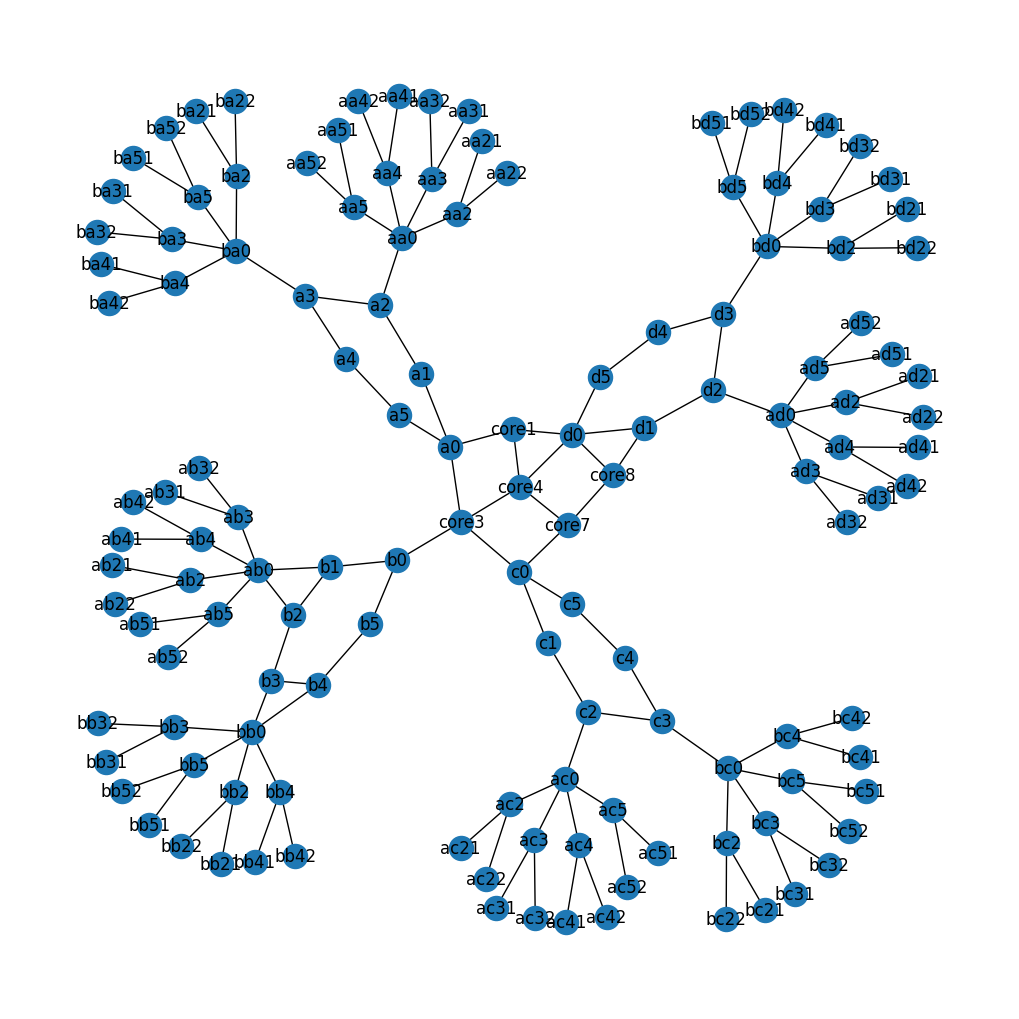

In [49]:
from networkx import connected_components

cge = ConstructedGraph(expanded=True)
cge.draw()

cge = ConstructedGraph(expanded=True)
print(cge.delete_random_nodes().connected_components().draw())

cge = ConstructedGraph(expanded=True)
print(cge.delete_random_nodes(3).get_largest_components_size())

## seed does seem not work. delete_random_nodes gir meg nodene [d1] (når jeg fjerner 1 node), og nodene [ab5, bd3, ab22] (når jeg fjerner 3 noder).



## Oppgave 3.3
Prøv å angripe nettverket ved å bruke en kombinasjon av logisk tenkning og verdiene fra oppgave 3.1. Oppgaven her er å gjøre så mye skade som mulig ved å fjerne tre noder.

For hver node du velger å fjerne, begrunn hvorfor.

<em> Her forventer vi at studenten har forstått oppgaven og velger å fjerne tre noder som er svært sentrale. Forventer å se begrunnelse/tankegang for hver node som fjernes. </em>

In [26]:
#Kode her


## Oppgave 3.4
En måte å se hvor mye skade som har blitt gjort på et nettverk er å bruke noder i største partisjon, eller se på node degree ved hjelp av et histogram.

Bruk disse metodene på oppgave 3.2 og 3.3, og diskuter skadene ut fra resultatene du får.

<em> Her forventer vi å se at studenten klarer å vise histogram og klarer å bruke metoden for å finne noder i største partisjon. Vi forventer også å se en drøftning av konsekvensene i de to foregående oppgavene, og at studenten skjønner alvorligheten i målrettede angrep.</em>

In [27]:
#Kode her


## Oppgave 3.5
Hva kan være fordeler og ulemper ved å kun bruke noder i største partisjon og histogram som pålitelighetsmål? Er dette fornuftig i vårt tilfelle?

<em> Her forventer vi å se at studenten har forstått begrepet noder i største partisjon, og hvorfor dette kan brukes til å vise sårbarhet. Vi forventer også en drøftning av hvorfor/hvorfor ikke det kan være lurt å bruke noder i største partisjon og histogram som den eneste måten for å vurdere robustheten til nettverket.</em>

In [28]:
# Forklar her


## Oppgave 3.6
Under ser du metoden for å lage en graf som sammenligner angrep med forskjellige metoder. Bruk metoden på det originale nettverket og sammenlign med det samme nettverket der du har lagt inn tre ekstra kanter som redundans. Diskuter kort effekten av ekstra redundans.

<em> Her forventer vi å se at studenten har klart å bruke metoden som er gitt til å vise skaden på det originale nettverket. Deretter forventer vi å se at studenten klarer å legge inn tre ekstra kanter, og begrunne hvorfor disse tre kantene er valgt. Til slutt vil vi se en kort diskusjon av effekten vi får av å legge til ekstra kanter i et nettverk.</em>

In [29]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Amount of nodes in largest partition")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


# Del 4: Sikring av VDES

Du er nå ansatt som en sikkerhetsingeniør i VDES og har som oppgave å styrke nettverket mot angrep, både mot ondsinnede handlinger og tilfeldige feil. Du skal først analysere nettverket, påpeke åpenbare svakheter og legge til ekstra redundans der det trengs, uten at kostnadene skal bli unødvendig høye. For å analysere og sikre nettverket kan du bruke metodene som er introdusert i øvingen. Forklar dine valg. Drøft også konsekvensene av at ondsinnede aktører får tak i informasjon om nettverkstopologien. 

Analysen skal vise en gjennomgående forståelse av grafteori. Forståelse av relevante fagbegreper blir vektlagt. Oppgaven skal være kort og konsis, maks 800 ord. Start oppgaven med et bilde av nettverket. Bruk figurer, histogrammer og grafer til å vise hvordan og hvorfor du vil sikre nettverket. Er det noen typer noder som er viktigere å sikre enn andre? Utforsk gjerne ved å legge til redundans og teste angrep for å vurdere tiltakene dine. Bruk gjerne <code>get_attack_graph()</code>. Kom med en anbefaling for hvordan nettverket bedre kan sikres mot angrep og tilfeldige feil basert på dine funn.

Nettverket du skal analysere finner du ved å kjøre kodeblokken under:

In [30]:
r.seed(student_seed)
boat_count = r.randint(4,6)
satellite_count = r.randint(1,3)
radio_tower_count = r.randint(2,4)

vdesGraph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdesGraph.draw()

NameError: name 'r' is not defined